# CAPSTONE PROJECT - 6    FRAUD ANALYSIS USING ML ALGORITHMS

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
%matplotlib inline
import datetime
import seaborn as sns
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score


In [2]:
df = pd.read_csv('C:\\Users\\ayush\\Desktop\\udemy ml\\1 Fraud Analysis using ML Algorithms\\Purchase_Fraud_Data.csv')
df.head(5)
df1=df.copy()

In [4]:
df.shape

(151112, 12)

In [6]:
df.count()

user_id           151112
signup_time       151112
purchase_time     151112
purchase_value    151112
device_id         151112
source            151112
browser           151112
sex               146185
ip_address        151112
class             151112
category          151112
dob               146188
dtype: int64

In [3]:
df.describe()

,user_id,purchase_value,ip_address,class
count,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,50521.469003,2.152145e+09,0.093646
std,115369.285024,28533.667117,1.248497e+09,0.291336
min,2.000000,1016.000000,5.209350e+04,0.000000
25%,100642.500000,25919.000000,1.085934e+09,0.000000
50%,199958.000000,50484.000000,2.154770e+09,0.000000
75%,300054.000000,75296.250000,3.243258e+09,0.000000
max,400000.000000,100092.000000,4.294850e+09,1.000000


In [10]:
df.isna().sum()

user_id              0
signup_time          0
purchase_time        0
purchase_value       0
device_id            0
source               0
browser              0
sex               4927
ip_address           0
class                0
category             0
dob               4924
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             146185 non-null  object 
 8   ip_address      151112 non-null  float64
 9   class           151112 non-null  int64  
 10  category        151112 non-null  object 
 11  dob             146188 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 13.8+ MB


In [5]:
df.isna().sum()/len(df)*100
#we can see the null values in Sex and Dob

user_id           0.000000
signup_time       0.000000
purchase_time     0.000000
purchase_value    0.000000
device_id         0.000000
source            0.000000
browser           0.000000
sex               3.260496
ip_address        0.000000
class             0.000000
category          0.000000
dob               3.258510
dtype: float64

In [6]:
#Since it has null values less than 10 % we can drop sex and dob columns.

In [7]:
df['class'].value_counts()

0    136961
1     14151
Name: class, dtype: int64

In [8]:
df = df.dropna()
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,home_essentials,22-2-1976
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,apparels,2-1-1962
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,electronics,5-3-1962
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,health_care,3-7-1974
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,home_essentials,25-8-1970


In [9]:
df['class'].value_counts()

0    128164
1     13240
Name: class, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141404 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         141404 non-null  int64  
 1   signup_time     141404 non-null  object 
 2   purchase_time   141404 non-null  object 
 3   purchase_value  141404 non-null  int64  
 4   device_id       141404 non-null  object 
 5   source          141404 non-null  object 
 6   browser         141404 non-null  object 
 7   sex             141404 non-null  object 
 8   ip_address      141404 non-null  float64
 9   class           141404 non-null  int64  
 10  category        141404 non-null  object 
 11  dob             141404 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 14.0+ MB


In [11]:
df.isna().sum()/len(df)*100

user_id           0.0
signup_time       0.0
purchase_time     0.0
purchase_value    0.0
device_id         0.0
source            0.0
browser           0.0
sex               0.0
ip_address        0.0
class             0.0
category          0.0
dob               0.0
dtype: float64

In [12]:
df.skew()

user_id           0.001247
purchase_value    0.000862
ip_address       -0.007756
class             2.789898
dtype: float64

In [13]:
df.std()

user_id           1.153234e+05
purchase_value    2.853566e+04
ip_address        1.248164e+09
class             2.913177e-01
dtype: float64

# Outlier visualization

<AxesSubplot:>

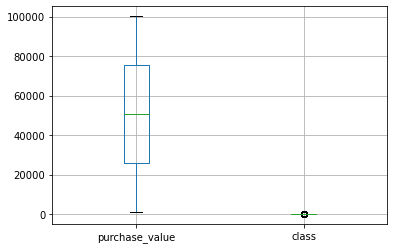

In [17]:
df.drop(['user_id','ip_address'],axis=1).boxplot()
# we can observe that no outlier present.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141404 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         141404 non-null  int64  
 1   signup_time     141404 non-null  object 
 2   purchase_time   141404 non-null  object 
 3   purchase_value  141404 non-null  int64  
 4   device_id       141404 non-null  object 
 5   source          141404 non-null  object 
 6   browser         141404 non-null  object 
 7   sex             141404 non-null  object 
 8   ip_address      141404 non-null  float64
 9   class           141404 non-null  int64  
 10  category        141404 non-null  object 
 11  dob             141404 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 14.0+ MB


In [19]:
obj=df.select_dtypes(include='object').columns
obj

Index(['signup_time', 'purchase_time', 'device_id', 'source', 'browser', 'sex',
       'category', 'dob'],
      dtype='object')

In [20]:
df1['class']=df1['class'].astype('object')


# UNIVARIATE ANALYSIS OF NUMERICAL COLUMN

In [21]:
num=['purchase_value']

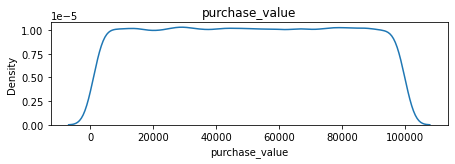

In [22]:
a = 4 
b = 2 
counter = 1 
plt.figure(figsize = [12, 8])

for i in num:
    plt.subplot(a,b,counter)
    plt.title(i)
    sns.kdeplot(df1.loc[:, i])
    counter = counter+1 
plt.tight_layout()
plt.show()

In [23]:
# Purchase value is highly skewed

# UNIVARIATE ANALYSIS OF CATEGORICAL COLUMN

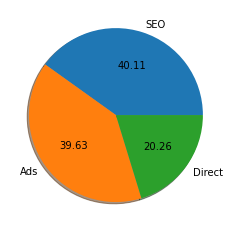

In [24]:
x=df1['source'].value_counts()
plt.pie(x,labels=x.index,autopct='%0.2f',shadow=True)
plt.show()

In [25]:
# SEO is highest in percentage followed by Ads and Direct.

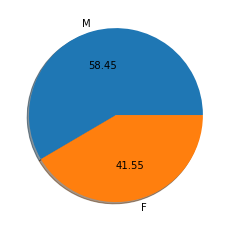

In [26]:
x=df1['sex'].value_counts()
plt.pie(x,labels=x.index,autopct='%0.2f',shadow=True)
plt.show()

In [27]:
# Males are more in percentage as compared to females.

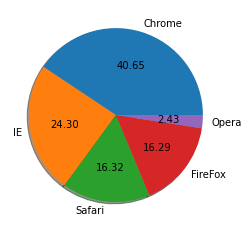

In [28]:
x=df1['browser'].value_counts()
plt.pie(x,labels=x.index,autopct='%0.2f',shadow=True)
plt.show()

In [29]:
# Most people are using Chrome followed by IE,Safari,Firefox and Opera.

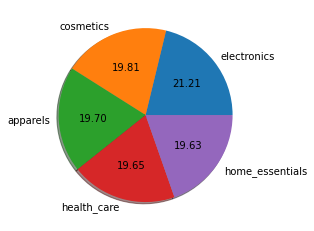

In [30]:
x=df1['category'].value_counts()
plt.pie(x,labels=x.index,autopct='%0.2f',shadow=True)
plt.show()

# Bi variate analysis of the categorical columns.

# Customer segmentation on the basis of source,browser,sex,category

In [31]:
obj=[ 'source', 'browser', 'sex','category']

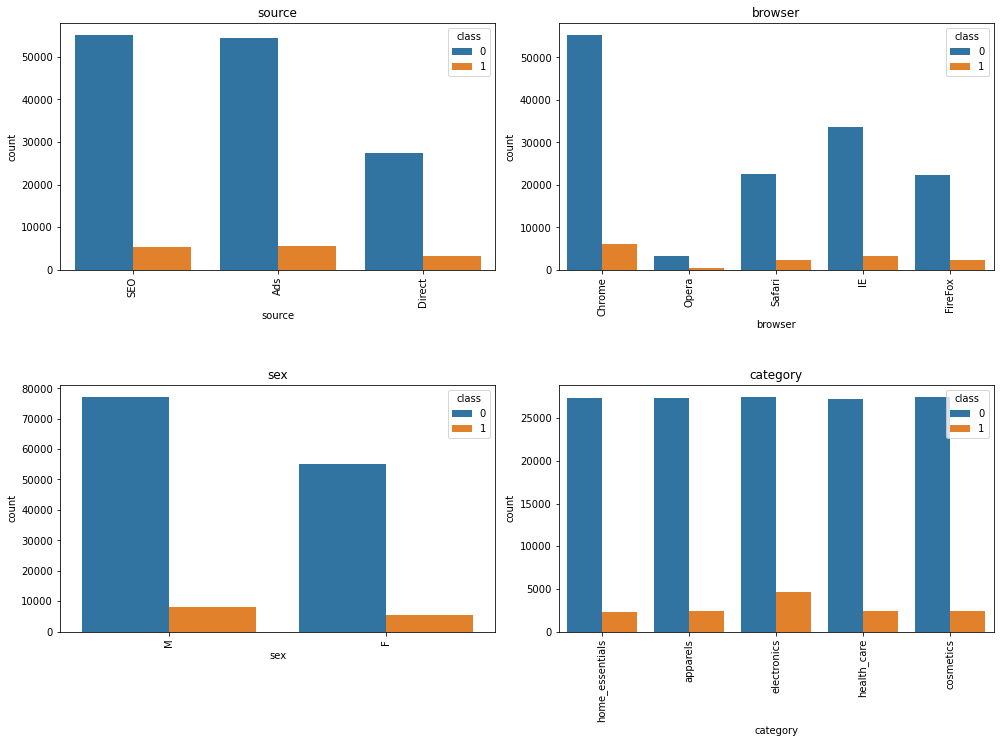

In [32]:
cols=obj
a = 3
b = 2
counter = 1
plt.figure(figsize = [14, 14])
for i in cols:
    plt.subplot(a,b,counter)
    plt.title(i)
    sns.countplot(x=df1[i],hue=df1['class'])
    counter = counter+1
    plt.xticks(rotation=90)    
plt.tight_layout()
plt.show()  

# Bi variate analysis of the continuous columns.

# Customer segmentation on the basis of purchase value

In [33]:
num=df1.select_dtypes(exclude='object').columns

In [34]:
num[1]

'purchase_value'

<AxesSubplot:title={'center':'category'}, xlabel='class', ylabel='purchase_value'>

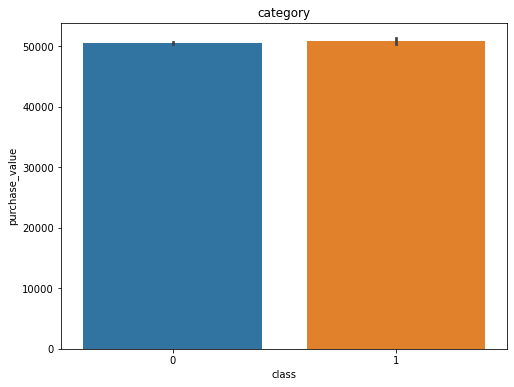

In [35]:
cols=num[1]
plt.figure(figsize=[8,6])
plt.title(i)
sns.barplot(y=df1['purchase_value'],x=df1['class'])

In [36]:
#Equal amount of Average purcahse done by Fraud and non Fraud.

In [37]:
df1['purchase_value'].min()

1016

In [38]:
df1['purchase_value'].median()

50484.0

In [39]:
df1['purchase_value'].mean()

50521.46900312351

In [40]:
df1['purchase_value'].max()

100092

# Binning of purchase column

In [41]:
df1['Purchase_Amount_Cat']=pd.cut(df['purchase_value'],bins=[1016 ,20000,50000,100092],
                                labels=['purchase_value in 1k and  20k','purchase_value in 20k and 50k','purchase_value Between  50k and 100k'])

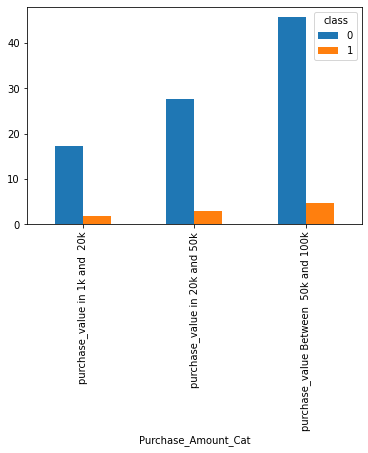

In [42]:
(pd.crosstab(df1['Purchase_Amount_Cat'],df1['class'],normalize=True)*100).plot(kind="bar")
plt.show()

In [44]:
# Most of the regular transactions are taking place between purchase amount of 20k to 100k.
# Most Fraud Transaction are happening in range 50 k and 100 k

In [45]:
df.drop(['dob','device_id','ip_address','user_id'],axis=1,inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141404 entries, 0 to 151111
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   signup_time     141404 non-null  object
 1   purchase_time   141404 non-null  object
 2   purchase_value  141404 non-null  int64 
 3   source          141404 non-null  object
 4   browser         141404 non-null  object
 5   sex             141404 non-null  object
 6   class           141404 non-null  int64 
 7   category        141404 non-null  object
dtypes: int64(2), object(6)
memory usage: 13.7+ MB


In [48]:
df.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,class,category
0,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,SEO,Chrome,M,0,home_essentials
1,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,Ads,Chrome,F,0,apparels
2,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,SEO,Opera,M,1,electronics
3,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,SEO,Safari,M,0,health_care
4,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,Ads,Safari,M,0,home_essentials


In [49]:
df['class'].value_counts()

0    128164
1     13240
Name: class, dtype: int64

In [50]:
#We can see that our class is imbalanced 

# Conversion Of Date Time of Signup  and Purchase Time 

In [51]:
import datetime as dt
df['tot_mins_diff']=pd.to_datetime(df['purchase_time'])-pd.to_datetime(df['signup_time'])

df.head()

df['tot_mins_diff'] = df['tot_mins_diff'].dt.total_seconds()

# Conversion of Difference in Minutes 

df['tot_mins_diff']=df['tot_mins_diff']/60

df.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,class,category,tot_mins_diff
0,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,SEO,Chrome,M,0,home_essentials,75111.366667
1,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,Ads,Chrome,F,0,apparels,299.066667
2,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,SEO,Opera,M,1,electronics,0.016667
3,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,SEO,Safari,M,0,health_care,8201.416667
4,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,Ads,Safari,M,0,home_essentials,72691.016667


In [52]:
df.drop(['signup_time','purchase_time'],axis=1,inplace=True)

# Customer segmentation on the basis of difference between signup time and purchase time

In [53]:
import datetime as dt
df1['tot_mins_diff']=pd.to_datetime(df1['purchase_time'])-pd.to_datetime(df1['signup_time'])

df1.head()

df1['tot_mins_diff'] = df1['tot_mins_diff'].dt.total_seconds()

# Conversion of Difference in Minutes 

df1['tot_mins_diff']=df1['tot_mins_diff']/60

df1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob,Purchase_Amount_Cat,tot_mins_diff
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,home_essentials,22-2-1976,purchase_value Between 50k and 100k,75111.366667
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,apparels,2-1-1962,purchase_value Between 50k and 100k,299.066667
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,electronics,5-3-1962,purchase_value Between 50k and 100k,0.016667
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,health_care,3-7-1974,purchase_value in 20k and 50k,8201.416667
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,home_essentials,25-8-1970,purchase_value in 20k and 50k,72691.016667


In [54]:
df1['tot_mins_diff'].max()

172799.53333333333

In [55]:
df1['tot_mins_diff'].min()

0.016666666666666666

In [56]:
df1['tot_mins_diff'].mean()

81063.32718711476

In [57]:
df1['tot_mins_diff'].median()

80775.15833333333

In [58]:
df1['total_mins_diff']=pd.cut(df['tot_mins_diff'],bins=[0.01 ,1000,50000,173000],
                                labels=['time between 0 to 1000 min','time between 1000 to 50000 min','time between 50000 to 1730000 min'])

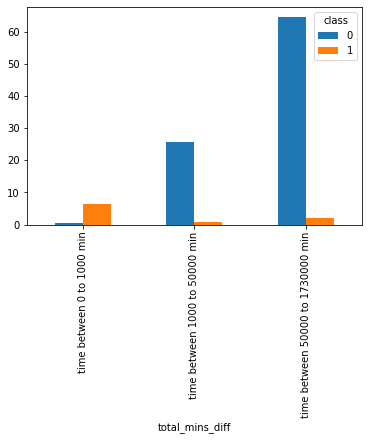

In [59]:
(pd.crosstab(df1['total_mins_diff'],df1['class'],normalize=True)*100).plot(kind="bar")
plt.show()

In [60]:
# Most of the fraud transactions are betwwen to 0 to 1000 mins of interval.
# We can also observe that fraud people are taking less time than people who are making regular transaction.
# people who are making Regular transactions are taking more time than 1000 mins.

# Customer segmentation on the basis of different age group

In [61]:
import datetime as dt
df1['dob'] = pd.to_datetime(df1['dob'], format = "%d-%m-%Y")
now = pd.Timestamp('now')
df1['age'] = (now - df1['dob'])
df1['age']  = df1['age'].astype(str)
df1[['age','age_waste']] = df1['age'].str.split("days",expand=True)

In [62]:
df1 = df1.drop(['age_waste'],axis = 1)

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   user_id              151112 non-null  int64         
 1   signup_time          151112 non-null  object        
 2   purchase_time        151112 non-null  object        
 3   purchase_value       151112 non-null  int64         
 4   device_id            151112 non-null  object        
 5   source               151112 non-null  object        
 6   browser              151112 non-null  object        
 7   sex                  146185 non-null  object        
 8   ip_address           151112 non-null  float64       
 9   class                151112 non-null  object        
 10  category             151112 non-null  object        
 11  dob                  146188 non-null  datetime64[ns]
 12  Purchase_Amount_Cat  141403 non-null  category      
 13  tot_mins_diff 

In [64]:

df1['age'] = pd.to_numeric(df1['age'], errors='coerce')

In [65]:
df1['age']=df1['age']/365

In [66]:
df1['age'].max()

82.81917808219178

In [67]:
df1['age'].min()

24.164383561643834

In [68]:
df1['age'].mean()

40.5070352456641

In [69]:
df1['age'].median()

39.534246575342465

In [70]:
df1['age']=pd.cut(df1['age'],bins=[20,35,50,83],
                                labels=['age between 20 to 35','age between 35 to 50','age between 50 to 83'])

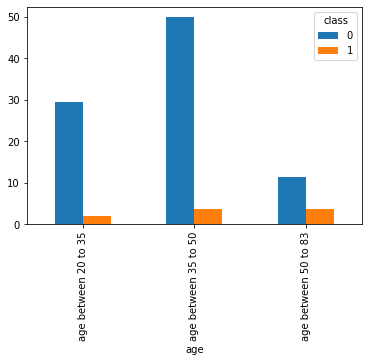

In [71]:
(pd.crosstab(df1['age'],df1['class'],normalize=True)*100).plot(kind="bar")
plt.show()

In [72]:
# Fraud transactions are higher between the ages of 50 to 83.
# Most of the regular transactions are done by the age group of 35 to 50.

In [73]:
# Here We are converting categorical data into dummy or indicator variables.
df=pd.get_dummies(df,drop_first=True)

<AxesSubplot:>

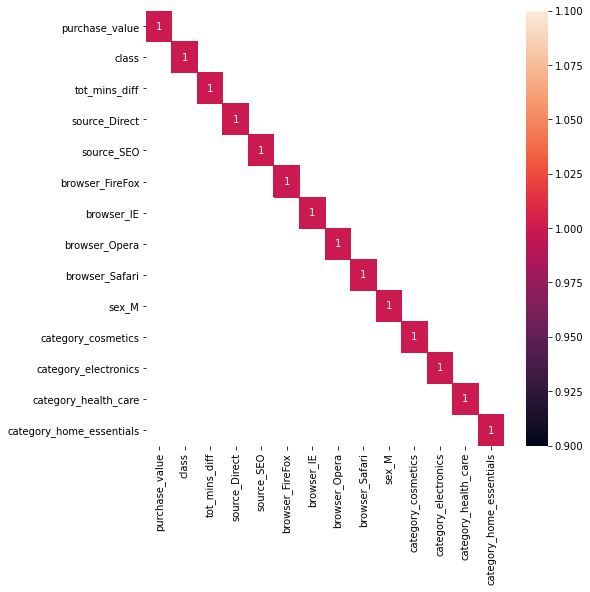

In [75]:
plt.figure(figsize=[8,8])
sns.heatmap(df.corr()[df.corr()>0.5],annot=True)

In [76]:
# No strong co-relation with the target class

# Base Model

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [78]:
X=df.drop('class',axis=1)
y=df['class']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [80]:
logrg = LogisticRegression(solver='lbfgs')
logrg_model=logrg.fit(X_train, y_train)
ypred_prob = logrg_model.predict(X_test)

In [82]:
pd.Series(ypred_prob).value_counts()
#No Fraud Class detected

0    28281
dtype: int64

In [83]:
y_test.value_counts()

0    25636
1     2645
Name: class, dtype: int64

In [84]:
cm_lr = confusion_matrix(y_test, ypred_prob)
print(cm_lr)

[[25636     0]
 [ 2645     0]]


In [85]:
TN = cm_lr[0,0]

TP = cm_lr[1,1]

FP = cm_lr[0,1]

FN = cm_lr[1,0]

In [86]:
# precision
precision_lr = TP/(TP+FP)
precision_lr

<ipython-input-86-49c923b76999>:2: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_lr = TP/(TP+FP)


nan

In [87]:
# recall(true positive rate)
recall_lr = TP/(TP+FN)
recall_lr

0.0

In [88]:
# f1 score
f1_score_lr = 2*((precision_lr*recall_lr)/(precision_lr+recall_lr))
f1_score_lr

nan

In [89]:
# classification report
cr_lr = classification_report(y_test, ypred_prob)
print(cr_lr)

#As we can see that model is not able to perform good on our Target Class hence we need to oversample or try another model.

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     25636
           1       0.00      0.00      0.00      2645

    accuracy                           0.91     28281
   macro avg       0.45      0.50      0.48     28281
weighted avg       0.82      0.91      0.86     28281



C:\Users\ayush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
ypred_prob_train = logrg.fit(X_train, y_train).predict(X_train)

In [91]:
# accauracy score on train
round(accuracy_score(y_train,ypred_prob_train),2)

0.91

In [92]:
# accuracy score on test
round(accuracy_score(y_test,ypred_prob),2)

0.91

# Using Smote to Balance the Class 

In [93]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_sm, y_train_sm= sm.fit_resample(X_train, y_train.astype('int'))

In [94]:
df['class'].value_counts()

0    128164
1     13240
Name: class, dtype: int64

In [95]:
y_train_sm.value_counts()

0    102528
1    102528
Name: class, dtype: int64

In [96]:

lr=LogisticRegression(random_state=20,solver='liblinear')
lr_model=lr.fit(X_train_sm,y_train_sm)

y_pred_smote=lr_model.predict(X_test)

print(classification_report(y_test,y_pred_smote))
print()
print('RFC score ',np.mean(cross_val_score(lr,X_train_sm,y_train_sm,cv=5)))
print()
print(confusion_matrix(y_test,y_pred_smote))
print()
print('train score ',lr_model.score(X_train_sm,y_train_sm))
print()
print('test score ',lr_model.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85     25636
           1       0.25      0.78      0.38      2645

    accuracy                           0.76     28281
   macro avg       0.61      0.77      0.61     28281
weighted avg       0.90      0.76      0.81     28281


RFC score  0.7545987305116568

[[19453  6183]
 [  595  2050]]

train score  0.7545304697253433

test score  0.760333793005905


In [97]:
# Since our model has imporved for the Target class we can say that it has improved,but we will try with another models.
# Train AND Test are not having equal score which means model is not underfitting. 

# Using Decision tree model

In [98]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(random_state=10)
dc_model=dc.fit(X_train_sm,y_train_sm)

y_pred_dc=dc_model.predict(X_test)

print(classification_report(y_test,y_pred_dc))
print()

print('RFC score ',np.mean(cross_val_score(dc,X_train_sm,y_train_sm,cv=5)))
print()
print(confusion_matrix(y_test,y_pred_dc))
print()
print('train score ',dc_model.score(X_train_sm,y_train_sm))
print()
print('test score ',dc_model.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     25636
           1       0.46      0.70      0.55      2645

    accuracy                           0.90     28281
   macro avg       0.71      0.81      0.75     28281
weighted avg       0.92      0.90      0.90     28281


RFC score  0.9158622657879494

[[23488  2148]
 [  805  1840]]

train score  1.0

test score  0.895583607368905


In [99]:
#Model is Overfitting

# Using Random forest

In [100]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
Rfc=RandomForestClassifier(random_state=10)
Rfc_model=Rfc.fit(X_train_sm,y_train_sm)

y_pred_rfc=Rfc_model.predict(X_test)

print(classification_report(y_test,y_pred_rfc))
print()
print('RFC score ',np.mean(cross_val_score(Rfc,X_train_sm,y_train_sm,cv=5)))
print()
print(confusion_matrix(y_test,y_pred_rfc))
print()
print('train score ',Rfc_model.score(X_train_sm,y_train_sm))
print()
print('test score ',Rfc_model.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     25636
           1       0.59      0.70      0.64      2645

    accuracy                           0.93     28281
   macro avg       0.78      0.83      0.80     28281
weighted avg       0.93      0.93      0.93     28281


RFC score  0.9427183917416775

[[24366  1270]
 [  791  1854]]

train score  0.9999658629837703

test score  0.9271242176726424


In [ ]:
# Model is overfitting

# Tuned Random Forest Model

In [101]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
Rfc=RandomForestClassifier(random_state=10,criterion='gini',max_depth= 20,min_samples_split= 2,n_estimators =200)
Rfc_modeltune=Rfc.fit(X_train_sm,y_train_sm)

y_pred_tune=Rfc_modeltune.predict(X_test)

print(classification_report(y_test,y_pred_tune))
print()
print('RFC score ',np.mean(cross_val_score(Rfc_modeltune,X_train_sm,y_train_sm,cv=5)))
print()
print(confusion_matrix(y_test,y_pred_tune))
print()
print('train score ',Rfc_modeltune.score(X_train_sm,y_train_sm))
print()
print('test score ',Rfc_modeltune.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     25636
           1       0.54      0.70      0.61      2645

    accuracy                           0.92     28281
   macro avg       0.75      0.82      0.78     28281
weighted avg       0.93      0.92      0.92     28281


RFC score  0.9289806745975048

[[24046  1590]
 [  789  1856]]

train score  0.9611667056803995

test score  0.9158799193805028


In [ ]:
# Model is overfitting

# Using adaboost model

In [102]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(random_state=20)
abc_model=abc.fit(X_train_sm,y_train_sm)

y_pred_ada=abc_model.predict(X_test)

print(classification_report(y_test,y_pred_ada))
print()

print('RFC score ',np.mean(cross_val_score(abc,X_train_sm,y_train_sm,cv=5)))
print()
print(confusion_matrix(y_test,y_pred_ada))

print('train score ',abc_model.score(X_train_sm,y_train_sm))

print('test score ',abc_model.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     25636
           1       0.51      0.71      0.59      2645

    accuracy                           0.91     28281
   macro avg       0.74      0.82      0.77     28281
weighted avg       0.93      0.91      0.92     28281


RFC score  0.9054553504369018

[[23840  1796]
 [  774  1871]]
train score  0.9079373439450686
test score  0.9091262685195007


In [103]:
from sklearn.model_selection import ParameterGrid

import parfit.parfit as pf

from sklearn.metrics import roc_auc_score, recall_score
#Check first with Adaboost
ad = AdaBoostClassifier()

paramGrid = ParameterGrid({
    'n_estimators': [100,150,175,200,250],
    'learning_rate': [0.1,0.3,0.5,0.7,0.9]    
})

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:  1.6min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:  1.8min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  2.1min remaining:   40.3s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:  2.3min remaining:   19.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   17.7s finished


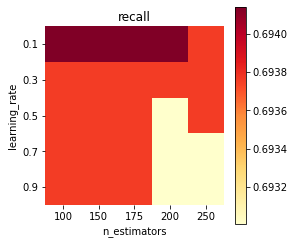

In [104]:
best_model, best_score, all_models, all_scores = pf.bestFit(ad, paramGrid, 
     X_train,y_train,X_test, y_test, 
     metric=recall_score, scoreLabel='recall')

# Tunned Adaboost

In [105]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(random_state=20,n_estimators=100,learning_rate=0.1)
abc_model_tune=abc.fit(X_train_sm,y_train_sm)

y_pred_ada_tune=abc_model.predict(X_test)

print(classification_report(y_test,y_pred_ada_tune))
print()

print('RFC score ',np.mean(cross_val_score(abc,X_train_sm,y_train_sm,cv=5)))
print()
print(confusion_matrix(y_test,y_pred_ada_tune))

print('train score ',abc_model_tune.score(X_train_sm,y_train_sm))

print('test score ',abc_model_tune.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     25636
           1       0.51      0.71      0.59      2645

    accuracy                           0.91     28281
   macro avg       0.74      0.82      0.77     28281
weighted avg       0.93      0.91      0.92     28281


RFC score  0.8843097334874696

[[23840  1796]
 [  774  1871]]
train score  0.8827052122347067
test score  0.9545277748311587


# Gradient Boost Model

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=10)
pred_test_gb_sm = gb.fit(X_train_sm,y_train_sm).predict(X_test)

print(classification_report(y_test,pred_test_gb_sm))
print()

print('RFC score ',np.mean(cross_val_score(gb,X_train_sm,y_train_sm,cv=5)))
print()
print(confusion_matrix(y_test,pred_test_gb_sm))

print('train score ',gb.score(X_train_sm,y_train_sm))

print('test score ',gb.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     25636
           1       0.51      0.71      0.59      2645

    accuracy                           0.91     28281
   macro avg       0.74      0.82      0.77     28281
weighted avg       0.93      0.91      0.92     28281


RFC score  0.9076790914949913

[[23836  1800]
 [  771  1874]]
train score  0.9082153167915106
test score  0.9090909090909091


# Using XGboost

In [107]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=10,eval_metric='logloss',use_label_encoder=False)
xgb_model=xgb.fit(X_train_sm,y_train_sm)
y_pred_xgb=xgb_model.predict(X_test)

print(classification_report(y_test,y_pred_xgb))
print()

print('RFC score ',np.mean(cross_val_score(xgb,X_train_sm,y_train_sm,cv=5)))
print()
print(confusion_matrix(y_test,y_pred_xgb))

print('train score ',xgb_model.score(X_train_sm,y_train_sm))

print('test score ',xgb_model.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     25636
           1       0.55      0.71      0.62      2645

    accuracy                           0.92     28281
   macro avg       0.76      0.82      0.79     28281
weighted avg       0.93      0.92      0.92     28281


RFC score  0.914496809039558

[[24098  1538]
 [  779  1866]]
train score  0.9222651373283396
test score  0.9180722039531841


# Use of Parfit for model tuning

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:  2.7min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:  3.1min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  3.7min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:  4.1min remaining:   33.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.1s finished


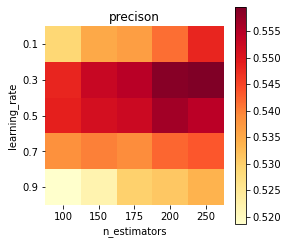

In [108]:
from sklearn.model_selection import ParameterGrid

import parfit.parfit as pf

from sklearn.metrics import roc_auc_score, recall_score
xg = XGBClassifier()

paramGrid = ParameterGrid({
    'n_estimators': [100,150,175,200,250],
    'learning_rate': [0.1,0.3,0.5,0.7,0.9],
    
})
best_model, best_score, all_models, all_scores = pf.bestFit(xg, paramGrid, 
     X_train_sm, y_train_sm, X_test, y_test, 
     metric=precision_score, scoreLabel='precison')

# Tunned XG Boost

In [109]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=10,eval_metric='logloss',use_label_encoder=False,n_estimators=250,learning_rate=0.3)
xgb_model_tune=xgb.fit(X_train_sm,y_train_sm)
y_pred_xgb_tune=xgb_model.predict(X_test)

print(classification_report(y_test,y_pred_xgb_tune))
print()

print('RFC score ',np.mean(cross_val_score(xgb,X_train_sm,y_train_sm,cv=5)))
print()
print(confusion_matrix(y_test,y_pred_xgb_tune))

print('train score ',xgb_model_tune.score(X_train_sm,y_train_sm))

print('test score ',xgb_model_tune.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     25636
           1       0.55      0.71      0.62      2645

    accuracy                           0.92     28281
   macro avg       0.76      0.82      0.79     28281
weighted avg       0.93      0.92      0.92     28281


RFC score  0.9200465063048279

[[24098  1538]
 [  779  1866]]
train score  0.9359296972534332
test score  0.9205473639545985


0.9359296972534332


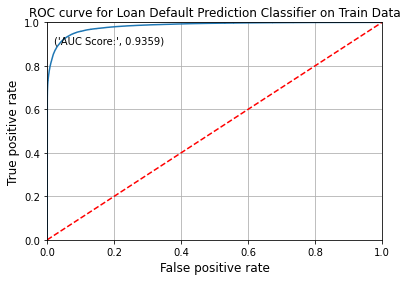

In [110]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
y_pred_xgb_tune = xgb.fit(X_train_sm, y_train_sm).predict(X_train_sm)
print(accuracy_score(y_train_sm, y_pred_xgb_tune))

y_pred_prob_train = xgb.predict_proba(X_train_sm)[:,1]
    
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function

fpr, tpr, thresholds = roc_curve(y_train_sm, y_pred_prob_train)


# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model

plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Loan Default Prediction Classifier on Train Data', fontsize = 12)
plt.xlabel('False positive rate', fontsize = 12)
plt.ylabel('True positive rate', fontsize = 12)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_train_sm, y_pred_xgb_tune),4)))

# plot the grid
plt.grid(True)

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


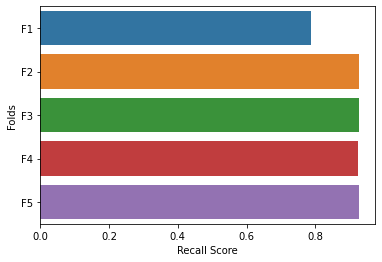

In [111]:
from sklearn.model_selection import cross_val_score
score_val = cross_val_score(xgb,X= X_train_sm,y= y_train_sm, cv = 5, scoring = 'recall')
score_val

fold = ['F1', 'F2', 'F3', 'F4', 'F5']
sns.barplot(score_val, fold)
plt.xlabel('Recall Score')
plt.ylabel('Folds')
plt.show()

In [112]:
print('average mean recall score is     -->>>>>',score_val.mean())

average mean recall score is     -->>>>> 0.8981064339225637


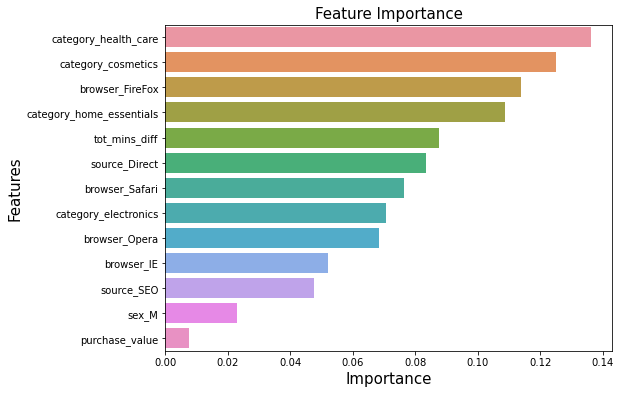

In [113]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': X_train_sm.columns, 
                                   'Importance': xgb.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize = (8,6))
# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [114]:
# We can finally see that there's no overfitting issue in our model
# After using SMOTE, the accuracy score of both train and test set is very much close to each other.

# We also see that our TunedXGboost model attains a significant high roc auc score of 93% on test set.
# and Mean Cross validation recall score of 89%. 